In [ ]:
# Itinializing the Jopyter Notebook file WeatherPy.ipynb

In [156]:
# Importing relevant modules 
import requests
import json
from config import api_key

In [157]:
# Importing PrettyPrint module for a more readable JSON formatting
from pprint import pprint

In [158]:
# Import citypy 
from citipy import citipy

In [159]:
city=citipy.nearest_city(-10.0,20.21)
city.city_name

'saurimo'

In [200]:
# Initialize empty lists & city counter
city_names=[]
lat=[]
lon=[]
city_count=0

temperature=[]
humidity=[]
cloudiness=[]
wind_speed=[]

# Setup base url for OpenWeatherMap API call
base_url = "http://api.openweathermap.org/data/2.5/weather?"




# Import numpy random for generating random range of latitude and longitude numbers  
from numpy import random

# set up while loop that will run until 500 valid city names are generated
while city_count<500 :        
    try :
        #vlatitude values trange from -90 to 90 
        rand_lat= -180 + 360 * random.random(1)[0]
    
        # longitude ranges from -180 to 180  
        rand_lon= -90 + 180 * random.random(1)[0]
        
        rand_city=citipy.nearest_city(rand_lat, rand_lon)
        
        if rand_city.city_name not in city_names:
#             print(">>>>>>>>>>>>>>about to append city name:" + rand_city.city_name)
            city_names.append(rand_city.city_name)
#             print(">>>>>>>>>>>>>>About to append (lon, lat):" + str(rand_lat) +"," + str(rand_lon))
            lat.append(rand_lat)
            lon.append(rand_lon)
            
            # Build query url based on teh name of the current selected city  
            query_url = base_url + "appid=" + api_key + "&q=" + rand_city.city_name

            # Pull data from API and convert to json format  
            weather_response = requests.get(query_url)
            weather_json = weather_response.json()

            try :
                # Pull specific itemized data as requested as appedn to corresponding list
                temp_F = round(( weather_json['main']['temp'] - 273.15 ) * 9 / 5 + 32, 2)
                temperature.append(temp_F)
            except (ValueError, KeyError):
                temperature.append(np.nan)
            
            try :
                humidity_pct = weather_json['main']['humidity']
                humidity.append(humidity_pct)
            except (ValueError, KeyError):
                humidity.append(np.nan)
            
            try :
                cloudiness_pct = weather_json['clouds']['all']
                cloudiness.append(cloudiness_pct)
            except (ValueError, KeyError):
                cloudiness.append(np.nan)
            
            try :
                wind = weather_json['wind']['speed']
                wind_speed.append(wind)
            except (ValueError, KeyError):
                wind_speed.append(np.nan)
            
            
#             print("len city_names=" + str(len(city_names)) + "|" + str(city_count) + " | " +rand_city.city_name +" | "+ str(temp_F) +" | "+ str(humidity_pct))

            city_count+=1
            print(city_count)
        else :
            ">>>>>    City already sampled"
            
    except (ValueError, KeyError):
        print("------------------")

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


Text(0.5, 1.0, 'Location of 1000 sampled cities (in lon&lat coordinates)')

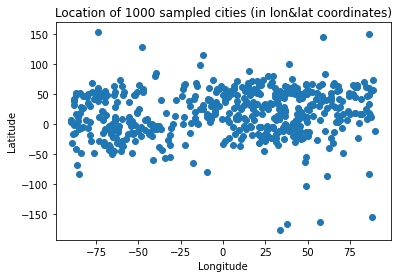

In [201]:
# Import matplotlib and plot sampled points to check visually for good coverage/diversity 
import matplotlib.pyplot as plt

plt.scatter(lon, lat)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Location of 1000 sampled cities (in lon&lat coordinates)")

In [204]:
# Create dictionary of city names and associated lat, lon coordinates
import pandas as pd

len(city_names),len(lat),len(lon),len(temperature), len(humidity),len(wind_speed), len(cloudiness)
city_dict={
    "City name": city_names,
    'Longitude': lon,
    'Latitude': lat,
    'Temperature, F': temperature,
    'Humidity, %': humidity,
    'Cloudiness, %': cloudiness,
    'Wind speed, mph': wind_speed
}
city_data=pd.DataFrame(city_dict)
city_data.head()
# city_data['City name'].nunique()

,City name,Longitude,Latitude,"Temperature, F","Humidity, %","Cloudiness, %","Wind speed, mph"
0,qaanaaq,-73.685480,153.574077,32.85,72.0,0.0,3.29
1,dikson,86.106293,151.363463,18.21,92.0,12.0,2.12
2,ushuaia,-85.122125,-82.428154,31.66,80.0,90.0,9.77
3,kemijarvi,27.496362,65.540184,46.89,50.0,79.0,1.53
4,port elizabeth,57.436809,-163.491863,64.69,88.0,0.0,4.63


In [97]:
# Setup base url for OpenWeatherMap API call
base_url = "http://api.openweathermap.org/data/2.5/weather?"

# Building query URL
query_url = base_url + "appid=" + api_key + "&q=" + city_data['City name'][0]
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=0cb0504e124c591594132d882d112599&q=port alfred'

In [98]:
# Retriev weather data
weather_response = requests.get(query_url)
weather_json = weather_response.json()

# Review the data API pulled
pprint(weather_json)

# Below fisrt work on setting up and troubleshooting calls to pull temperature in K 
# and convert to F, humidity (%), cloudiness (%) and wind speed (mph)

{'base': 'stations',
 'clouds': {'all': 96},
 'cod': 200,
 'coord': {'lat': -33.5906, 'lon': 26.891},
 'dt': 1621961820,
 'id': 964432,
 'main': {'feels_like': 291.8,
          'grnd_level': 1016,
          'humidity': 83,
          'pressure': 1018,
          'sea_level': 1018,
          'temp': 291.72,
          'temp_max': 291.72,
          'temp_min': 291.72},
 'name': 'Port Alfred',
 'sys': {'country': 'ZA', 'sunrise': 1621919048, 'sunset': 1621955697},
 'timezone': 7200,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 235, 'gust': 4.71, 'speed': 3.77}}


In [99]:
weather_json.keys()

dict_keys(['coord', 'weather', 'base', 'main', 'visibility', 'wind', 'clouds', 'dt', 'sys', 'timezone', 'id', 'name', 'cod'])

In [100]:
weather_json['main'].keys()

dict_keys(['temp', 'feels_like', 'temp_min', 'temp_max', 'pressure', 'humidity', 'sea_level', 'grnd_level'])

In [101]:
weather_json['main']['temp']

291.72

In [108]:
temp_F= ( weather_json['main']['temp'] - 273.15 ) * 9 / 5 + 32
round(temp_F,2)

65.43

In [110]:
humidity_pct = weather_json['main']['humidity']
humidity_pct

83

In [112]:
cloudiness_pct = weather_json['clouds']['all']

96

In [113]:
wind_speed = weather_json['wind']['speed']
wind_speed

3.77